In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch

In [8]:
# ── CONFIGURE HERE ──
country      = 'IND'         # ISO-3 code for India
country_name = 'India'
year         = '2022'

# ── helper to pull one indicator from WB API ──
def fetch_series(indicator: str) -> float:
    url   = f'http://api.worldbank.org/v2/country/{country}/indicator/{indicator}'
    resp  = requests.get(url, params={'format':'json','date':year})
    return float(resp.json()[1][0]['value'])

In [9]:
# ── 1) Fetch data ──
total_pop       = fetch_series('SP.POP.TOTL')
age_percents    = {
    '0–14':  fetch_series('SP.POP.0014.TO.ZS'),
    '15–64': fetch_series('SP.POP.1564.TO.ZS'),
    '65+':   fetch_series('SP.POP.65UP.TO.ZS'),
}
gender_percents = {
    'Male':   fetch_series('SP.POP.TOTL.MA.ZS'),
    'Female': fetch_series('SP.POP.TOTL.FE.ZS'),
}

In [10]:
# ── 2) Convert to absolute counts ──
age_counts    = { ag: pct/100 * total_pop for ag, pct in age_percents.items() }
gender_counts = { g:  pct/100 * total_pop for g, pct in gender_percents.items() }

# ── formatter to show “x.xM” ──
def to_millions(x, pos):
    return f"{x/1e6:.1f} M"

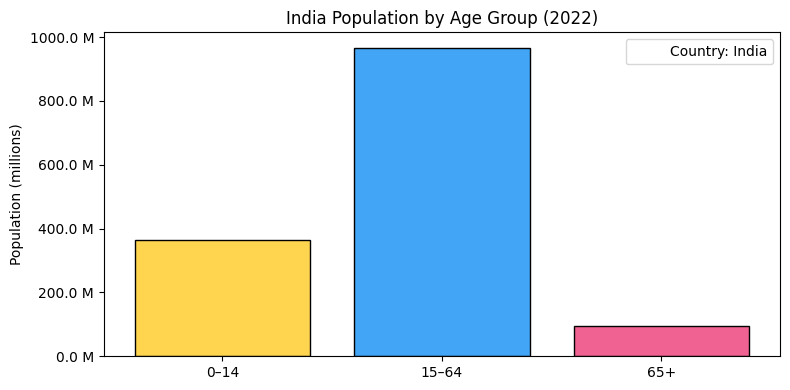

In [11]:
# ── 3) Plot Age Distribution ──
fig, ax = plt.subplots(figsize=(8,4))
colors = ['#ffd54f','#42a5f5','#f06292']
ax.bar(age_counts.keys(),
       age_counts.values(),
       color=colors, edgecolor='k')

# add country legend
legend_handle = Patch(facecolor='white', edgecolor='none', label=f'Country: {country_name}')
ax.legend(handles=[legend_handle], loc='upper right')

ax.set_title(f'{country_name} Population by Age Group ({year})')
ax.set_ylabel('Population (millions)')
ax.yaxis.set_major_formatter(FuncFormatter(to_millions))
plt.tight_layout()
plt.show()

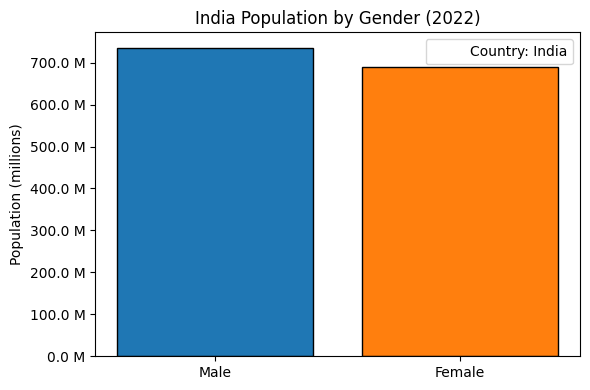

In [12]:
# ── 4) Plot Gender Distribution ──
fig, ax = plt.subplots(figsize=(6,4))
colors = ['#1f77b4','#ff7f0e']
ax.bar(gender_counts.keys(),
       gender_counts.values(),
       color=colors, edgecolor='k')

# same country legend
ax.legend(handles=[legend_handle], loc='upper right')

ax.set_title(f'{country_name} Population by Gender ({year})')
ax.set_ylabel('Population (millions)')
ax.yaxis.set_major_formatter(FuncFormatter(to_millions))
plt.tight_layout()
plt.show()